In [1]:
################################################################################################################################
############################## PRACTICA DL-CV: Jordi Ortega - IA2 ##############################################################
################################################################################################################################

# 0. Hito 3. Late Fusion

# 1. Entorno -> Importamos librerías y cargamos el dataset
# 2. Red Neuronal -> Importamos los modelos, lanzamos el algoritmo y conclusiones

In [2]:
################################################################################################################################
############################## ENTORNO #########################################################################################
################################################################################################################################

In [3]:
# Instalamos librerías e importamos los modelos de los hito 1 e hito 2

!pip install tensorflow==2.18
#%pip install tensorflow==2.17
!pip uninstall tf-keras -y
!pip install -U tensorflow

from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import load_model

drive.mount('/content/drive')
model1 = load_model('/content/drive/MyDrive/modelo_tabular.keras')
model2 = load_model('/content/drive/MyDrive/modelo_pictures_2.keras')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 852.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incomp

In [4]:
# Comprobamos los outputs de nuestros modelos 'origen'
for i, output in enumerate(model1.outputs):
    print(f"Forma de la salida {i} de model1:", output.shape)
for i, output in enumerate(model2.outputs):
    print(f"Forma de la salida {i} de model2:", output.shape)

Forma de la salida 0 de model1: (None, 1)
Forma de la salida 0 de model2: (None, 1)


In [5]:
print(model1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,698 (22.26 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1 (8.00 B)

None


In [6]:

print(model2.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │ 256)                   │                │                        │
├──────────────────────

 Total params: 23,988,997 (91.51 MB)

 Trainable params: 133,761 (522.50 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 267,524 (1.02 MB)

None


In [7]:
################################################################################################################################
############################## RED LATE FUSION #################################################################################
################################################################################################################################

In [8]:
# Prepramos la red neuronal con Late Fusion. Congelaremos los modelos 'origen' y entrenaremos las capas densas añadidas.

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout,BatchNormalization,Activation
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam


for layer in model1.layers:
    layer.trainable = False

for layer in model2.layers:
    layer.trainable = False

input1 = Input(shape=(47,))
input2 = Input(shape=(224, 224, 3))

tabular_prediction = model1(input1)

if isinstance(tabular_prediction, list):
    tabular_prediction = tabular_prediction[0]

image_prediction = model2(input2)

if isinstance(image_prediction, list):
    image_prediction = image_prediction[0]

tabular_prediction = Flatten()(tabular_prediction)
image_prediction = Flatten()(image_prediction)

fused_output = Concatenate()([tabular_prediction, image_prediction])

x = Dense(128)(fused_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
x = Dense(32)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, activation='relu')(x)
final_output = Dense(1)(x)


final_model = Model(inputs=[input1, input2], outputs=final_output)

learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

final_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

final_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 47)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 1)              │          5,697 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 1)              │     23,721,473 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 1)              │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 1)              │              0 │ functional[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 2)              │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │            384 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128)            │            512 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128)            │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64)             │            256 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 64)             │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          2,080 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32)             │            128 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 23,739,331 (90.56 MB)

 Trainable params: 11,713 (45.75 KB)

 Non-trainable params: 23,727,618 (90.51 MB)

In [9]:
import numpy as np

# Cargamos los datasets
data = np.load('/content/drive/MyDrive/data_split.npz')

X_train = data['X_train']
X_test = data['X_test']
X_train_imgs = data['X_train_imgs']
X_test_imgs = data['X_test_imgs']
y_train = data['y_train']
y_test = data['y_test']
X_val = data['X_val']
X_val_imgs = data['X_val_imgs']
y_val = data['y_val']

In [10]:
# Normalizamos
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)


scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [11]:
# Convertimos al mismo tipo de float
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_train_imgs = X_train_imgs.astype(np.float32)

In [12]:
# Validamos que las estructuras son correctas
print("X_train shape:", X_train.shape)
print("X_train_imgs shape:", X_train_imgs.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("X_val_imgs shape:", X_val_imgs.shape)
print("y_val shape:", y_val.shape)
print("X_train dtype:", X_train.dtype)
print("X_train_imgs dtype:", X_train_imgs.dtype)
print("y_train dtype:", y_train.dtype)
print("X_test shape:", X_test.shape)
print("X_test_imgs shape:", X_test_imgs.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1935, 47)
X_train_imgs shape: (1935, 224, 224, 3)
y_train shape: (1935,)
X_val shape: (216, 47)
X_val_imgs shape: (216, 224, 224, 3)
y_val shape: (216,)
X_train dtype: float32
X_train_imgs dtype: float32
y_train dtype: float32
X_test shape: (923, 47)
X_test_imgs shape: (923, 224, 224, 3)
y_test shape: (923,)


In [13]:
# Entrenamos el modelo
try:
    H = final_model.fit(
        [X_train, X_train_imgs],
        y_train,
        epochs=50,
        batch_size=64,
        validation_data=([X_val, X_val_imgs], y_val)

    )
except Exception as e:
    print(f"An error occurred during training: {e}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_384', 'keras_tensor_385']. Received: the structure of inputs=('*', '*')
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 45s 648ms/step - loss: 1.2075 - mae: 0.8156 - val_loss: 0.8495 - val_mae: 0.6351
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - loss: 0.8646 - mae: 0.6502 - val_loss: 0.8573 - val_mae: 0.6429
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.8464 - mae: 0.6593 - val_loss: 0.8702 - val_mae: 0.6491
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.7799 - mae: 0.6242 - val_loss: 0.8459 - val_mae: 0.6325
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.7379 - mae: 0.6040 - val_loss: 0.8221 - val_mae: 0.6140
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.7515 - mae: 0.6094 - val_loss: 0.8032 - val_mae: 0.6092
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.7320 - mae: 0.5913 - val_loss: 0.8096 - val_mae: 0.6046
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - loss: 0.7292 - mae: 0.5845 - val_loss: 0.7868 - val_mae: 0.5993
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 0.595

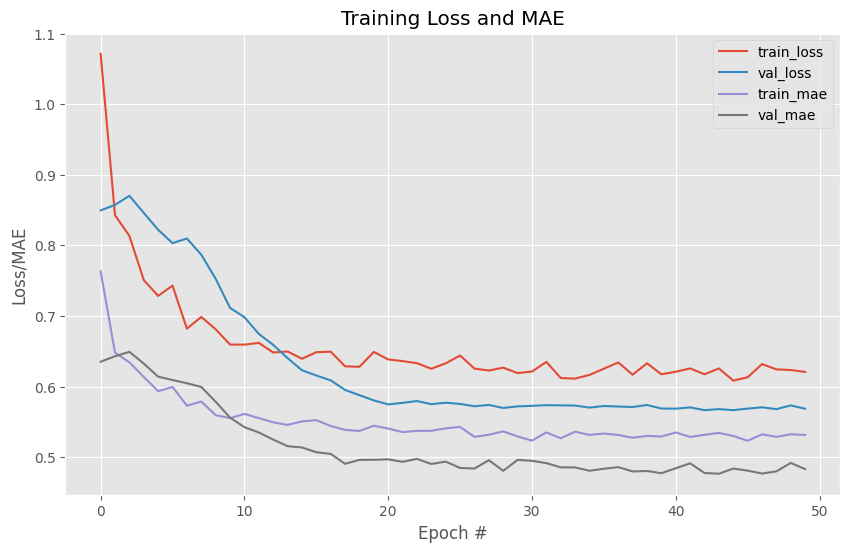

In [14]:
import matplotlib.pyplot as plt

# Representamos graficamente
plt.style.use("ggplot")

num_epochs = len(H.history['loss'])


plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H.history["mae"], label="train_mae")
plt.plot(np.arange(0, num_epochs), H.history["val_mae"], label="val_mae")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend()
plt.show()


In [15]:
# Conclusiones:
# 1. Observamos un modelo que aprende
# 2. Training y validación tienen un ritmo parejo lo que indica que no hay overfitting
# 3. Podríamos valorar parar el modelo en la época 20 o aplicar técnicas de regularización para mejorar la generalización del modelo

In [16]:
# Desnormalizamos las predicciones
predictions_final = final_model.predict([X_test, X_test_imgs])
predictions_desnormalizadas = scaler_y.inverse_transform(predictions_final.reshape(-1, 1))

print("Predicciones desnormalizadas:", predictions_desnormalizadas)

/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_384', 'keras_tensor_385']. Received: the structure of inputs=('*', '*')
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step
Predicciones desnormalizadas: [[ 89.3378  ]
 [108.47511 ]
 [113.075836]
 [ 89.372246]
 [107.50557 ]
 [ 89.38071 ]
 [183.9917  ]
 [227.75475 ]
 [153.30827 ]
 [ 98.80255 ]
 [274.50125 ]
 [162.62776 ]
 [110.67475 ]
 [ 89.868126]
 [161.63052 ]
 [105.04583 ]
 [243.87843 ]
 [111.198875]
 [273.82114 ]
 [100.58755 ]
 [138.81868 ]
 [227.58841 ]
 [180.5195  ]
 [184.92332 ]
 [ 99.29224 ]
 [107.383965]
 [231.07191 ]
 [ 94.82943 ]
 [115.482254]
 [265.22107 ]
 [104.58185 ]
 [ 70.27292 ]
 [143.95912 ]
 [121.643036]
 [115.66746 ]
 [117.274185]
 [ 88.88507 ]
 [243.71501 ]
 [ 96.204605]
 [116.47423 ]
 [118.76284 ]
 [127.911766]
 [163.53642 ]
 [ 99.712616]
 [172.41466 ]
 [109.129074]
 [220.79788 ]
 [348.63412 ]
 [142.52759 ]
 [ 97.21193 ]
 [286.5362  ]
 [282.9323  ]
 [176.77861 ]
 [163.39806 ]
 [209.33203 ]
 [218.96771 ]
 [109.68214 ]
 [278.27084 ]
 [145.01021 ]
 [128.62897 ]
 [100.87833 ]
 [131.32744 ]
 [146.95822 ]
 [ 82.21433 ]
 [105.55619 ]
 [196.046   ]
 [11

In [17]:
# 'Tangibilizamos algunos casos para ver los errores cometidos
y_test_desnormalizado = scaler_y.inverse_transform(y_test.reshape(-1, 1))
for i in range(5):
    print(f"Predicción desnormalizada {i+1}: {predictions_desnormalizadas[i][0]} | Precio real: {y_test_desnormalizado[i][0]}")

Predicción desnormalizada 1: 89.33779907226562 | Precio real: 80.0
Predicción desnormalizada 2: 108.47511291503906 | Precio real: 85.0
Predicción desnormalizada 3: 113.07583618164062 | Precio real: 145.0
Predicción desnormalizada 4: 89.37224578857422 | Precio real: 35.0
Predicción desnormalizada 5: 107.50556945800781 | Precio real: 97.0


In [18]:
# Añadimos el mae resumen como en el resto de modelos.
from sklearn.metrics import mean_absolute_error

predictions_desnormalizadas = scaler_y.inverse_transform(predictions_final.reshape(-1, 1))
y_test_desnormalizado = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculamos el MAE en euros
mae_test_euros = mean_absolute_error(y_test_desnormalizado, predictions_desnormalizadas)
print(f"El MAE en el conjunto de prueba es de {mae_test_euros:.2f} euros")

El MAE en el conjunto de prueba es de 66.69 euros


In [19]:
final_model.save('/content/drive/MyDrive/modelo_latefusion.keras')